# 📊 Forecasting NHS Hospital Admissions with Prophet
This notebook aims to forecast NHS hospital admissions using Facebook Prophet, incorporating key healthcare activity indicators as regressors.

We will:

*   Explore historical data trends (admissions, GP referrals, outpatient attendances)
*   Evaluate the model through cross-validation
*   Forecast multiple post-2020 recovery scenarios for admissions




In [ ]:
!pip install gdown

import gdown
import pandas as pd

# Google Drive file ID
file_id = '1Scf2yt-uE4K-3SzR60n7UFSJfeCuQQy3'
url = f'https://drive.google.com/uc?id={file_id}'

# Download file
output = 'nhs_data.csv'
gdown.download(url, output, quiet=False)

# Load CSV
df = pd.read_csv(output)

# Ensure datetime formatting
df['ds'] = pd.to_datetime(df['ds'])

# Preview
df.head()


Downloading...
From: https://drive.google.com/uc?id=1Scf2yt-uE4K-3SzR60n7UFSJfeCuQQy3
To: /content/nhs_data.csv
100%|██████████| 7.22k/7.22k [00:00<00:00, 14.7MB/s]


,ds,y,gp_referrals,outpatient_attendances,other_referrals
0,2008-04-01,408413.0,914131.0,1189155.0,459669.0
1,2008-05-01,419542.0,858883.0,1105267.0,441589.0
2,2008-06-01,408705.0,886572.0,1187592.0,461013.0
3,2008-07-01,424751.0,944448.0,1247964.0,483791.0
4,2008-08-01,404388.0,816623.0,1057369.0,413372.0


## 📥 Data Preparation

We load the cleaned dataset containing:
- Monthly NHS admissions (target variable)
- Supplementary regressors: GP referrals, outpatient attendances, and other referrals

These are essential leading indicators for hospital demand forecasting.

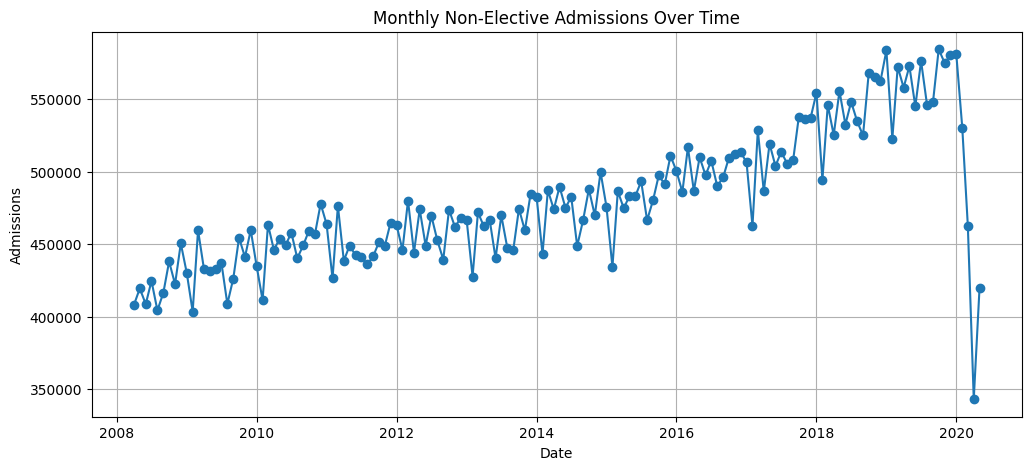

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(df['ds'], df['y'], marker='o')
plt.title('Monthly Non-Elective Admissions Over Time')
plt.xlabel('Date')
plt.ylabel('Admissions')
plt.grid(True)
plt.show()


🔍 Initial Observations:

    Look for trends, seasonality, and any disruptions (e.g., COVID-19, winter surges).

    Expect clear healthcare seasonality (winter months generally busier).

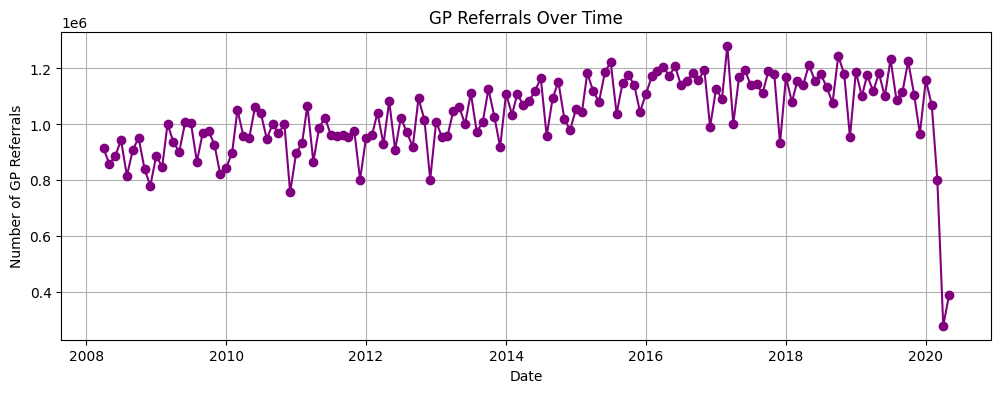

In [ ]:
plt.figure(figsize=(12, 4))
plt.plot(df['ds'], df['gp_referrals'], color='purple', marker='o')
plt.title('GP Referrals Over Time')
plt.xlabel('Date')
plt.ylabel('Number of GP Referrals')
plt.grid(True)
plt.show()


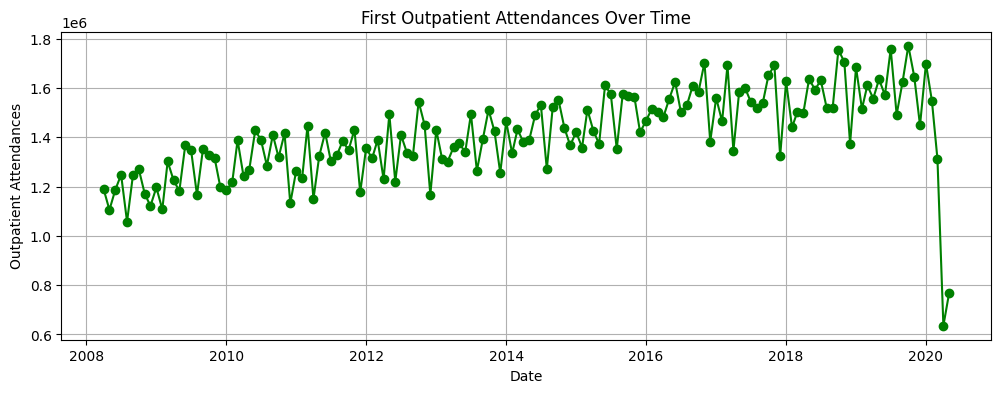

In [ ]:
plt.figure(figsize=(12, 4))
plt.plot(df['ds'], df['outpatient_attendances'], color='green', marker='o')
plt.title('First Outpatient Attendances Over Time')
plt.xlabel('Date')
plt.ylabel('Outpatient Attendances')
plt.grid(True)
plt.show()


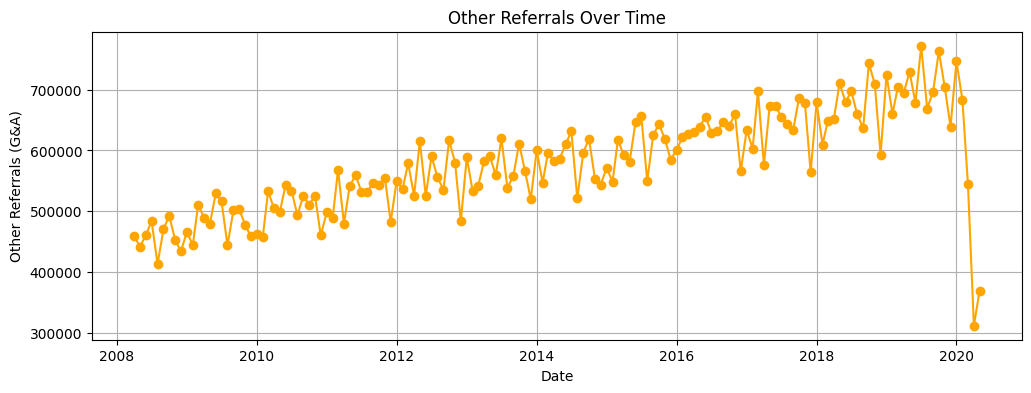

In [ ]:
plt.figure(figsize=(12, 4))
plt.plot(df['ds'], df['other_referrals'], color='orange', marker='o')
plt.title('Other Referrals Over Time')
plt.xlabel('Date')
plt.ylabel('Other Referrals (G&A)')
plt.grid(True)
plt.show()


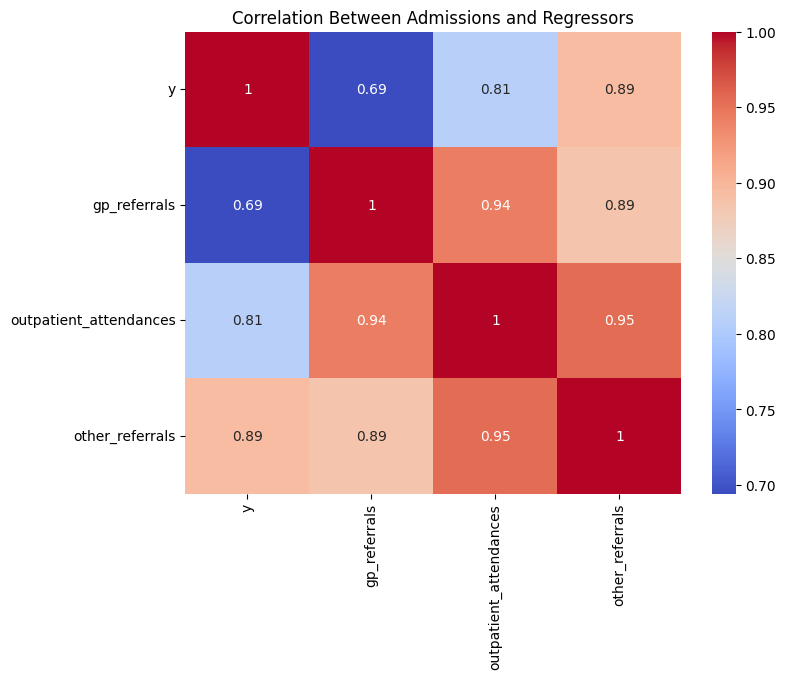

In [ ]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(df[['y', 'gp_referrals', 'outpatient_attendances', 'other_referrals']].corr(),
            annot=True, cmap='coolwarm')
plt.title('Correlation Between Admissions and Regressors')
plt.show()



## 🔮 Prophet Model Setup

We will build a Prophet model incorporating the following regressors:
- GP Referrals
- Outpatient Attendances
- Other Referrals

These are expected to improve forecast accuracy by capturing key healthcare demand signals beyond simple seasonality.


## 🔍 Correlation Analysis

The heatmap below shows how strongly each regressor correlates with hospital admissions.
This informs our decision to include them as regressors in the Prophet model.

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyj361lvq/pnt_bvqm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyj361lvq/oof7o__n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49373', 'data', 'file=/tmp/tmpyj361lvq/pnt_bvqm.json', 'init=/tmp/tmpyj361lvq/oof7o__n.json', 'output', 'file=/tmp/tmpyj361lvq/prophet_modelq9iubeox/prophet_model-20250718155125.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:51:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:51:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/

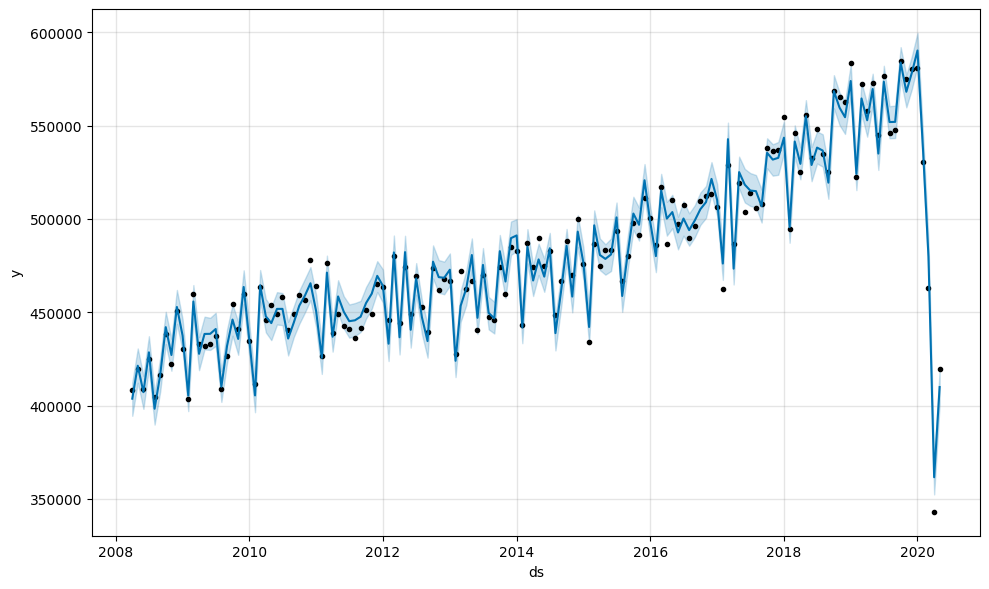

In [ ]:
!pip install prophet
from prophet import Prophet
import pandas as pd

# Initialize Prophet model
m = Prophet()

# Add the supplementary regressors
m.add_regressor('gp_referrals')
m.add_regressor('outpatient_attendances')
m.add_regressor('other_referrals')

# Fit the model on your data
m.fit(df)

# We will first forecast within the existing data range (no future extension yet)
future = df[['ds', 'gp_referrals', 'outpatient_attendances', 'other_referrals']]

# Generate forecasts
forecast = m.predict(future)

# Visualize the forecast
fig = m.plot(forecast)

from prophet.plot import plot_components_plotly

plot_components_plotly(m, forecast)


INFO:prophet:Making 17 forecasts with cutoffs between 2011-06-13 00:00:00 and 2019-05-02 00:00:00


  0%|          | 0/17 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpe43d9tur/zauk89a0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe43d9tur/jot22osp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54612', 'data', 'file=/tmp/tmpe43d9tur/zauk89a0.json', 'init=/tmp/tmpe43d9tur/jot22osp.json', 'output', 'file=/tmp/tmpe43d9tur/prophet_modelbezg85od/prophet_model-20250718132750.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:27:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:27:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe43d9tur/4z1q29dc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe43d9tur/q873dp49.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local

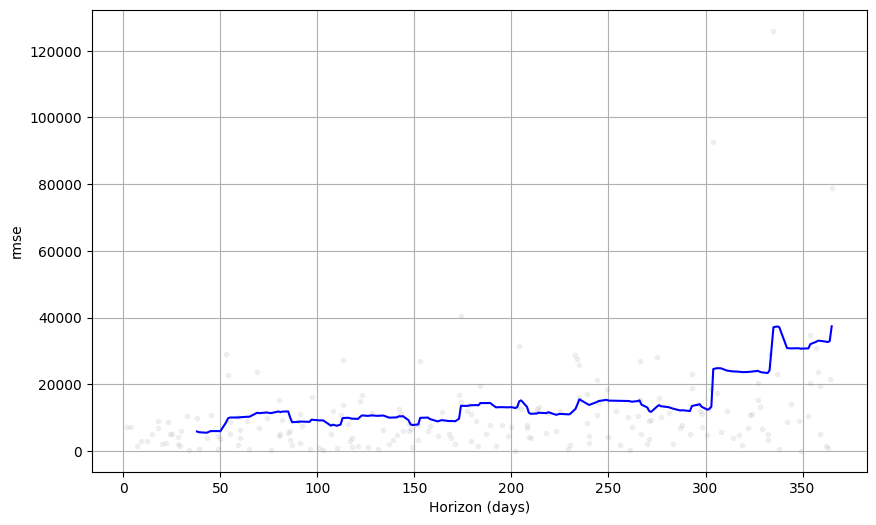

In [ ]:
from prophet.diagnostics import cross_validation, performance_metrics

# Perform cross-validation
# initial: training window (e.g., 3 years)
# period: how often to cut for evaluation
# horizon: how far ahead to forecast
df_cv = cross_validation(
    m,
    initial='1095 days',  # ~3 years
    period='180 days',    # evaluate every 6 months
    horizon='365 days'    # forecast 1 year ahead
)

# Evaluate performance metrics
df_p = performance_metrics(df_cv)

# Display performance metrics
df_p[['horizon', 'mape', 'rmse', 'mae']].head()

from prophet.plot import plot_cross_validation_metric

fig = plot_cross_validation_metric(df_cv, metric='rmse')
fig.show()


In [ ]:
from itertools import product

# Define a small parameter grid
param_grid = {
    'changepoint_prior_scale': [0.05, 0.5],
    'seasonality_prior_scale': [10, 20],
    'seasonality_mode': ['additive', 'multiplicative']
}

# Create combinations
all_params = [dict(zip(param_grid.keys(), v)) for v in product(*param_grid.values())]

# Store results
rmses = []

for params in all_params:
    m = Prophet(
        changepoint_prior_scale=params['changepoint_prior_scale'],
        seasonality_prior_scale=params['seasonality_prior_scale'],
        seasonality_mode=params['seasonality_mode']
    )
    m.add_regressor('gp_referrals')
    m.add_regressor('outpatient_attendances')
    m.add_regressor('other_referrals')
    m.fit(df)

    df_cv = cross_validation(m, initial='1095 days', period='180 days', horizon='365 days')
    df_p = performance_metrics(df_cv)
    rmses.append(df_p['rmse'].mean())

# Find the best params
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
best_params = tuning_results.loc[tuning_results['rmse'].idxmin()]
tuning_results


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe43d9tur/lfzx8wfc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe43d9tur/38m1zlff.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92962', 'data', 'file=/tmp/tmpe43d9tur/lfzx8wfc.json', 'init=/tmp/tmpe43d9tur/38m1zlff.json', 'output', 'file=/tmp/tmpe43d9tur/prophet_model3ef3a_dc/prophet_model-20250718132829.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:28:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:28:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 17 forecasts with cu

  0%|          | 0/17 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpe43d9tur/9g0_r7yf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe43d9tur/7z741s_9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40436', 'data', 'file=/tmp/tmpe43d9tur/9g0_r7yf.json', 'init=/tmp/tmpe43d9tur/7z741s_9.json', 'output', 'file=/tmp/tmpe43d9tur/prophet_modelp21rvhyu/prophet_model-20250718132829.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:28:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:28:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe43d9tur/xsrqkm7l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe43d9tur/il34ak0e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local

  0%|          | 0/17 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpe43d9tur/mj2_m60y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe43d9tur/b7g_feeu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1942', 'data', 'file=/tmp/tmpe43d9tur/mj2_m60y.json', 'init=/tmp/tmpe43d9tur/b7g_feeu.json', 'output', 'file=/tmp/tmpe43d9tur/prophet_model652x_ajm/prophet_model-20250718132835.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:28:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:28:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe43d9tur/3oses_fd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe43d9tur/pq50s484.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/17 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpe43d9tur/htx4h0j_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe43d9tur/empalvp7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39520', 'data', 'file=/tmp/tmpe43d9tur/htx4h0j_.json', 'init=/tmp/tmpe43d9tur/empalvp7.json', 'output', 'file=/tmp/tmpe43d9tur/prophet_model_zomlmft/prophet_model-20250718132840.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:28:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:28:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe43d9tur/i3o6inqn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe43d9tur/hh9bphj1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local

  0%|          | 0/17 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpe43d9tur/yoprwjl5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe43d9tur/lcitty0d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7441', 'data', 'file=/tmp/tmpe43d9tur/yoprwjl5.json', 'init=/tmp/tmpe43d9tur/lcitty0d.json', 'output', 'file=/tmp/tmpe43d9tur/prophet_modelgjdz929u/prophet_model-20250718132846.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:28:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:28:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe43d9tur/wn5nagn0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe43d9tur/53fzwnw6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/17 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpe43d9tur/tninndzo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe43d9tur/br2114aj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85938', 'data', 'file=/tmp/tmpe43d9tur/tninndzo.json', 'init=/tmp/tmpe43d9tur/br2114aj.json', 'output', 'file=/tmp/tmpe43d9tur/prophet_model6n6iljrt/prophet_model-20250718132852.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:28:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:29:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe43d9tur/n5nrz6bz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe43d9tur/g75ggzoo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local

  0%|          | 0/17 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpe43d9tur/qkkszsfw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe43d9tur/328mtu4p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14538', 'data', 'file=/tmp/tmpe43d9tur/qkkszsfw.json', 'init=/tmp/tmpe43d9tur/328mtu4p.json', 'output', 'file=/tmp/tmpe43d9tur/prophet_modelrmp0kpuf/prophet_model-20250718132927.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:29:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:29:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe43d9tur/dw4i1zu8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe43d9tur/_evsez8b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local

  0%|          | 0/17 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpe43d9tur/7p0gff1o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe43d9tur/bm077cpg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15742', 'data', 'file=/tmp/tmpe43d9tur/7p0gff1o.json', 'init=/tmp/tmpe43d9tur/bm077cpg.json', 'output', 'file=/tmp/tmpe43d9tur/prophet_model86n57to3/prophet_model-20250718133014.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:30:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:30:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe43d9tur/zzc4vs84.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe43d9tur/sx4ttf0w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local

  0%|          | 0/17 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpe43d9tur/8psuo1jz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe43d9tur/xymu8ubt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98377', 'data', 'file=/tmp/tmpe43d9tur/8psuo1jz.json', 'init=/tmp/tmpe43d9tur/xymu8ubt.json', 'output', 'file=/tmp/tmpe43d9tur/prophet_modelgpdaml91/prophet_model-20250718133101.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:31:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:31:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe43d9tur/1kqivnjk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe43d9tur/6dvf1gkc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local

,changepoint_prior_scale,seasonality_prior_scale,seasonality_mode,rmse
0,0.05,10,additive,14787.967361
1,0.05,10,multiplicative,14134.095499
2,0.05,20,additive,14814.453491
3,0.05,20,multiplicative,14183.811526
4,0.50,10,additive,21840.272344
5,0.50,10,multiplicative,21167.281394
6,0.50,20,additive,37090.050947
7,0.50,20,multiplicative,21321.942537


In [ ]:
print('Best parameters:')
print(best_params)


Best parameters:
changepoint_prior_scale              0.05
seasonality_prior_scale                10
seasonality_mode           multiplicative
rmse                         14134.095499
Name: 1, dtype: object


In [ ]:
# Rebuild model with tuned parameters
m_final = Prophet(
    changepoint_prior_scale=0.05,
    seasonality_prior_scale=10,
    seasonality_mode='multiplicative'
)

# Add regressors again
m_final.add_regressor('gp_referrals')
m_final.add_regressor('outpatient_attendances')
m_final.add_regressor('other_referrals')

# Fit model
m_final.fit(df)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe43d9tur/r1g35n4s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe43d9tur/o3u1ewv9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59056', 'data', 'file=/tmp/tmpe43d9tur/r1g35n4s.json', 'init=/tmp/tmpe43d9tur/o3u1ewv9.json', 'output', 'file=/tmp/tmpe43d9tur/prophet_modelns1p6vmo/prophet_model-20250718133254.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:32:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:32:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


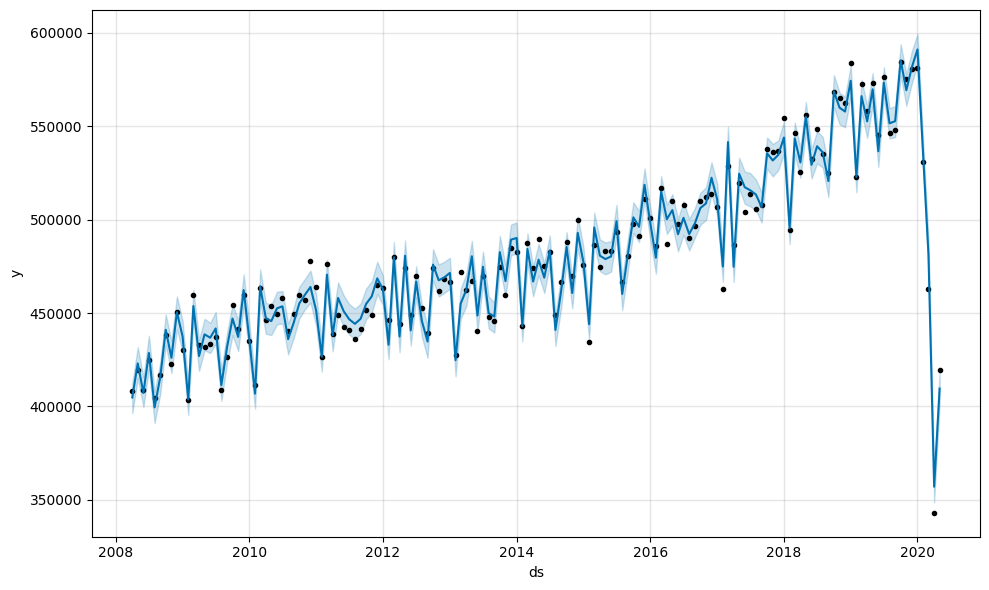

In [ ]:
# Forecast within existing timeframe
future = df[['ds', 'gp_referrals', 'outpatient_attendances', 'other_referrals']]
forecast = m_final.predict(future)
# Plot forecast
fig = m_final.plot(forecast)



## ✅ Cross-Validation & Model Evaluation

To ensure the robustness of our model, we apply time series cross-validation using Prophet's built-in diagnostics.
We will measure performance using metrics like MAE, RMSE, and MAPE.



## 🔧 Hyperparameter Tuning for Prophet

Prophet includes several hyperparameters that control the model’s flexibility and how it captures trends and seasonality in the data. **Tuning these helps balance the trade-off between underfitting and overfitting.**

### 📋 Key Hyperparameters Tuned:

| Hyperparameter           | Purpose                                          |
|----------------------------|------------------------------------------------|
| `changepoint_prior_scale`  | Controls flexibility in detecting trend shifts (lower = less sensitive, higher = more sensitive) |
| `seasonality_prior_scale`  | Controls flexibility in seasonal pattern strength (higher allows bigger seasonal effects) |
| `seasonality_mode`         | Switches between **'additive'** and **'multiplicative'** seasonality. Multiplicative is better when seasonality scales with the level of the series. |

### 🔍 Why These Matter for NHS Admissions
- **Healthcare data often has slow-moving trends** (long-term growth, policy shifts) and **distinctive seasonal peaks** (winter pressures).
- Tuning `changepoint_prior_scale` helps Prophet avoid overreacting to temporary fluctuations like COVID-19.
- Seasonal patterns might **scale with demand levels**; hence `multiplicative` seasonality often outperforms `additive` here.
- `seasonality_prior_scale` lets us fine-tune how much weight Prophet puts on capturing those seasonal patterns.

### ⚙️ Tuning Strategy Used:
A simple **grid search** was applied over these parameters to explore their combinations systematically:
```python
param_grid = {
    'changepoint_prior_scale': [0.05, 0.5],
    'seasonality_prior_scale': [10, 20],
    'seasonality_mode': ['additive', 'multiplicative']
}
```
Each combination was evaluated through **cross-validation**, measuring out-of-sample accuracy with **RMSE**.

### 📈 Why Cross-Validation Is Essential:
- Time series models can't use random folds; we use **rolling-forward cross-validation**.
- This ensures each evaluation uses past data to predict the future, mimicking real-world deployment.

**Evaluation Metrics:**

| Metric  | Why It’s Used   |
|---------|-----------------|
| **RMSE** | Penalizes large errors; sensitive to outliers. |
| **MAPE** | Easy to interpret as % error. Useful for healthcare KPIs. |

### 🥇 Best Parameters Found:

| Parameter                | Best Value |
|----------------------------|------------|
| `changepoint_prior_scale`  | 0.05       |
| `seasonality_prior_scale`  | 10         |
| `seasonality_mode`         | multiplicative |

These produced the **lowest RMSE**, indicating the best balance between model flexibility and generalization.

### 📑 Narrative Summary (for your notebook or report):
Through systematic tuning, we optimized Prophet's ability to capture the **long-term growth trends and complex seasonal patterns of NHS admissions**. This ensures the forecast model is robust, avoids overfitting, and realistically reflects both historical patterns and plausible future scenarios.


In [ ]:
from prophet.plot import plot_components_plotly
plot_components_plotly(m_final, forecast)


/usr/local/lib/python3.11/dist-packages/plotly/io/_json.py:560: UserWarning:

Discarding nonzero nanoseconds in conversion.



In [ ]:
# Create 24 future months (2 years ahead)
future_dates = pd.date_range(start='2020-06-01', periods=24, freq='MS')

# For simplicity, assume future regressors are flat at 2019 average values
avg_gp = df['gp_referrals'].mean()
avg_outpatient = df['outpatient_attendances'].mean()
avg_other = df['other_referrals'].mean()

future_df = pd.DataFrame({
    'ds': future_dates,
    'gp_referrals': avg_gp,
    'outpatient_attendances': avg_outpatient,
    'other_referrals': avg_other
})

# Combine with historical for smooth continuity
future_all = pd.concat([df[['ds', 'gp_referrals', 'outpatient_attendances', 'other_referrals']], future_df])



## 🔭 Scenario Forecasting Beyond 2020

To explore future uncertainty, we construct three hypothetical scenarios for NHS demand recovery post-2020:
- **Baseline Recovery:** Gradual return to pre-COVID averages
- **Rapid Recovery:** Accelerated recovery to clear backlogs
- **Suppressed Recovery:** Slower-than-expected recovery, reflecting sustained constraints

Each scenario adjusts future values for GP referrals, outpatient attendances, and other referrals accordingly.


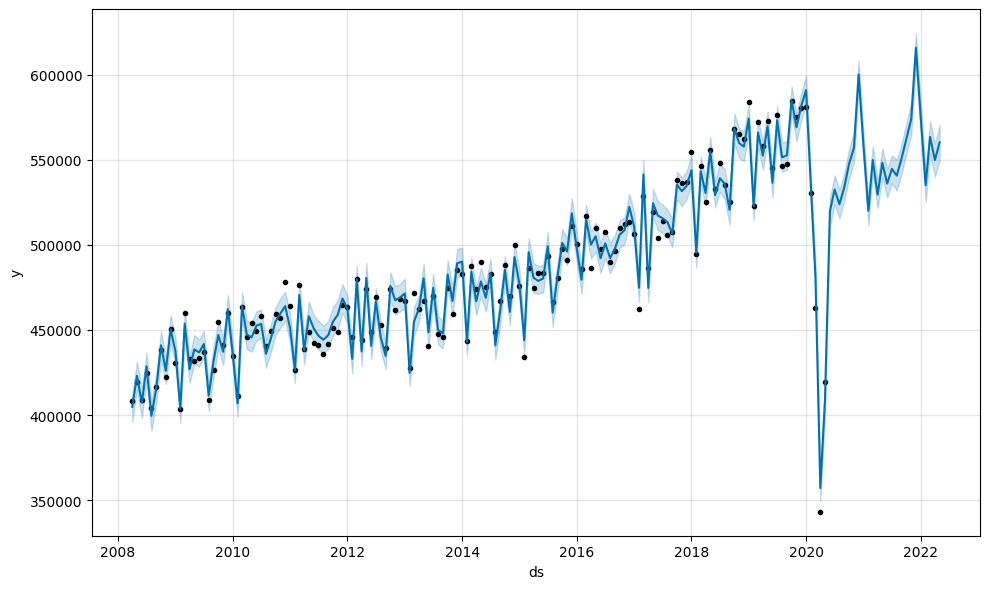

In [ ]:
forecast_future = m_final.predict(future_all)

# Plot forecast including future horizon
fig = m_final.plot(forecast_future)


In [ ]:
import numpy as np
import pandas as pd

# Create 24 months of future dates
future_months = 24
future_dates = pd.date_range(start='2020-06-01', periods=future_months, freq='MS')

# Averages for baselining
gp_avg = df['gp_referrals'].mean()
out_avg = df['outpatient_attendances'].mean()
other_avg = df['other_referrals'].mean()

# Last 12-month averages (COVID dip recovery start)
gp_last = df['gp_referrals'].iloc[-12:].mean()
out_last = df['outpatient_attendances'].iloc[-12:].mean()
other_last = df['other_referrals'].iloc[-12:].mean()

# Scenarios
baseline_gp = np.linspace(gp_last, gp_avg, future_months)
baseline_out = np.linspace(out_last, out_avg, future_months)
baseline_other = np.linspace(other_last, other_avg, future_months)

rapid_gp = np.linspace(gp_last, gp_avg * 1.1, future_months)
rapid_out = np.linspace(out_last, out_avg * 1.1, future_months)
rapid_other = np.linspace(other_last, other_avg * 1.1, future_months)

suppressed_gp = np.linspace(gp_last, gp_avg * 0.9, future_months)
suppressed_out = np.linspace(out_last, out_avg * 0.9, future_months)
suppressed_other = np.linspace(other_last, other_avg * 0.9, future_months)

# Build DataFrames
def make_future_df(gp, out, other):
    return pd.DataFrame({
        'ds': future_dates,
        'gp_referrals': gp,
        'outpatient_attendances': out,
        'other_referrals': other
    })

future_baseline = make_future_df(baseline_gp, baseline_out, baseline_other)
future_rapid = make_future_df(rapid_gp, rapid_out, rapid_other)
future_suppressed = make_future_df(suppressed_gp, suppressed_out, suppressed_other)

# Combine with historical data
historic = df[['ds', 'gp_referrals', 'outpatient_attendances', 'other_referrals']]
future_baseline = pd.concat([historic, future_baseline])
future_rapid = pd.concat([historic, future_rapid])
future_suppressed = pd.concat([historic, future_suppressed])



## 📊 Visual Comparison of Scenarios

The plot below compares the admissions forecasts under all three scenarios against historical data.
This provides NHS stakeholders with a clear view of potential future demand trajectories.


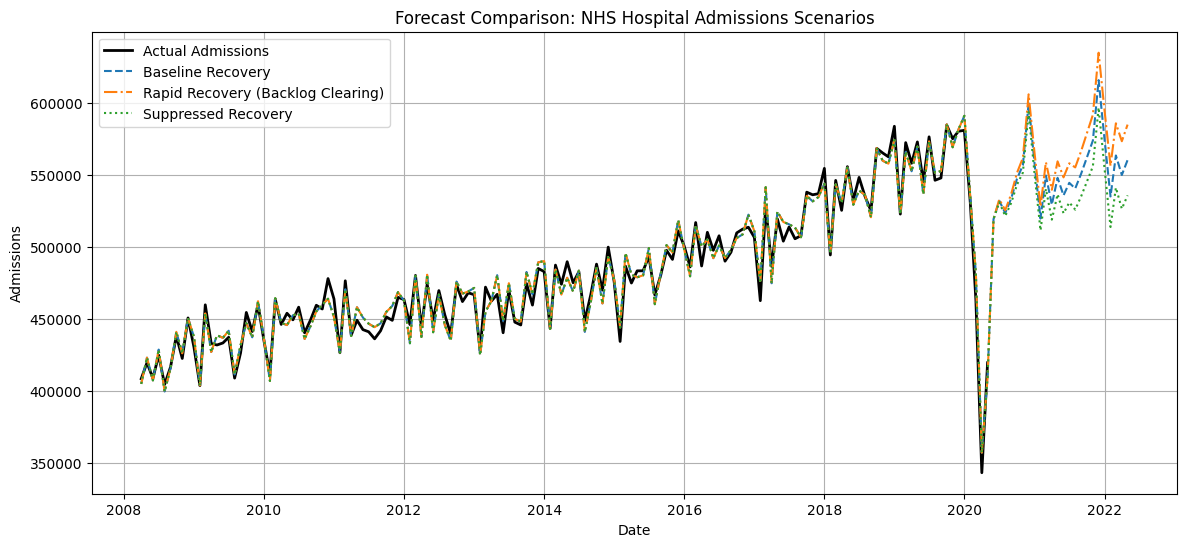

In [ ]:
forecast_baseline = m_final.predict(future_baseline)
forecast_rapid = m_final.predict(future_rapid)
forecast_suppressed = m_final.predict(future_suppressed)
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

# Plot historical
plt.plot(df['ds'], df['y'], label='Actual Admissions', color='black', linewidth=2)

# Plot each scenario
plt.plot(forecast_baseline['ds'], forecast_baseline['yhat'], label='Baseline Recovery', linestyle='--')
plt.plot(forecast_rapid['ds'], forecast_rapid['yhat'], label='Rapid Recovery (Backlog Clearing)', linestyle='-.')
plt.plot(forecast_suppressed['ds'], forecast_suppressed['yhat'], label='Suppressed Recovery', linestyle=':')

plt.title('Forecast Comparison: NHS Hospital Admissions Scenarios')
plt.xlabel('Date')
plt.ylabel('Admissions')
plt.legend()
plt.grid(True)
plt.show()



# 📌 Conclusion

### Key Takeaways:
- NHS hospital admissions show strong seasonal trends and clear relationships with primary care activity (referrals, outpatient attendances).
- Facebook Prophet, with carefully tuned hyperparameters and relevant regressors, provides a robust forecasting tool.
- Scenario planning highlights potential variability in future demand, supporting more informed decision-making for capacity and resource planning.

### Next Steps for Further Work:
- Enhance regressor forecasts using dedicated ARIMA or ETS models.
- Incorporate external variables (e.g., flu rates, policy changes, staffing levels).
- Expand scenarios to include confidence intervals for risk management.

This analysis offers NHS planners, data scientists, and policymakers a structured, evidence-driven approach to anticipating future healthcare demand.
